In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import time

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install imblearn

In [4]:
df = pd.read_csv('/content/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.shape

(284807, 31)

In [8]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
count = df['Class'].value_counts()
total_count = len(df)
class_percentage = count/total_count*100
class_formatted = class_percentage.round(2)
print(class_formatted.astype(str) + '%')

Class
0    99.83%
1     0.17%
Name: count, dtype: object


In [10]:
df.isnull().sum().max()

0

In [11]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


Text(0.5, 1.0, 'Class Distribution \n(0: No Fraud 1: Fraud)')

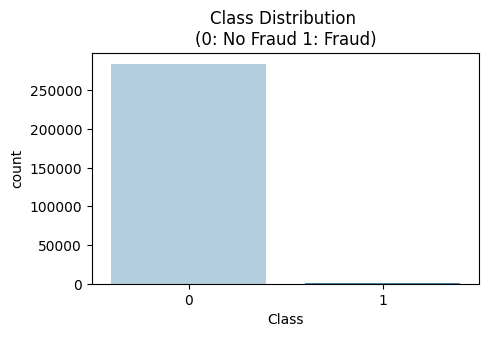

In [12]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Class', data=df, palette='Blues')
plt.title('Class Distribution \n(0: No Fraud 1: Fraud)')

In [13]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['Scaled_Amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Scaled_Time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1, 1))

df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [14]:
Scaled_Amount = df['Scaled_Amount']
Scaled_Time = df['Scaled_Time']

df.drop(['Scaled_Amount', 'Scaled_Time'], axis=1, inplace=True)
df.insert(0, 'Scaled_Amount', Scaled_Amount)
df.insert(1, 'Scaled_Time', Scaled_Time)

df

,Scaled_Amount,Scaled_Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-0.296653,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,0.038986,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,0.641096,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,-0.167680,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit, KFold

print('No Frauds', round(df['Class'].value_counts()[0]/len(df)*100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df)*100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [16]:
X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=None)

for train_index, test_index in sss.split(X, y):
    print('Train:', train_index, 'Test:', test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest= y.iloc[train_index], y.iloc[test_index]



Train: [ 92862 215241 169333 ...  44709  99327 199017] Test: [222063 276847 251219 ... 209098  89746  98415]
Train: [154531 273850  60668 ...  82046 271876  36710] Test: [   765 234886  89979 ... 132614 163172 210768]
Train: [  2596  33690 183772 ...  43801  39193 278417] Test: [113616 277008  20696 ... 201892 222149 226830]
Train: [167941 237996 150663 ... 108295 203639  33892] Test: [ 48536  78869 199414 ... 195225   6791 215772]
Train: [110345 264804 158349 ... 186161 186295 157989] Test: [118040 122515 122600 ... 159667  19074 246849]


In [17]:
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

In [18]:
train_unique, train_label = np.unique(original_ytrain, return_counts=True)
test_unique, test_label = np.unique(original_ytest, return_counts=True)
print(train_unique, train_label)
print(test_unique, test_label)

print('Label Distribution:')
print(train_label/len(original_ytrain))
print(test_label/len(original_ytest))

[0 1] [227451    394]
[0 1] [56864    98]
Label Distribution:
[0.99827075 0.00172925]
[0.99827955 0.00172045]


### **Random Under-Sampling**

In [19]:
df = df.sample(frac=1)

fraud_df = df.loc[df['Class']==1]
nonfraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, nonfraud_df])

new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()

,Scaled_Amount,Scaled_Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
173648,1.919933,0.433393,-0.332218,0.349979,0.988121,0.405223,-0.362529,-0.277777,1.084006,-0.015191,...,0.049866,0.011905,-0.202570,0.551559,-0.075868,-1.159289,-1.155520,0.233090,0.270136,0
137705,-0.293440,-0.028231,-1.464897,1.975528,-1.077145,2.819191,0.069850,-0.789044,-1.196101,0.673654,...,0.048969,0.174099,-0.272505,-0.031549,-0.406166,0.157769,-0.104393,0.073796,-0.041570,1
27254,-0.293440,-0.590080,1.133832,0.269665,0.275650,1.346481,0.027031,-0.118021,0.151417,0.030697,...,-0.258976,0.039151,0.340645,-0.042002,0.106255,0.642431,-0.220832,0.042167,0.009475,0
123301,-0.293440,-0.091824,-1.298359,1.079671,-0.180678,1.287839,1.858273,-2.223695,0.525167,-0.096874,...,-0.187572,-0.332983,-0.851270,-0.370800,0.298242,0.442930,-0.522832,0.000105,0.135698,1
229712,-0.290924,0.720521,0.908637,2.849024,-5.647343,6.009415,0.216656,-2.397014,-1.819308,0.338527,...,0.241921,0.407260,-0.397435,-0.080006,-0.168597,0.465058,0.210510,0.648705,0.360224,1


In [20]:
new_df['Class'].value_counts()/len(df)

Class
0    0.001727
1    0.001727
Name: count, dtype: float64

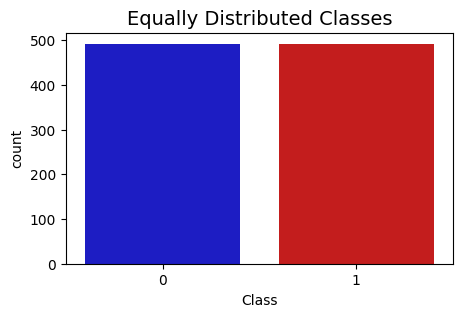

In [21]:
colors = ["#0101DF", "#DF0101"]

plt.figure(figsize=(5, 3))
sns.countplot(x='Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

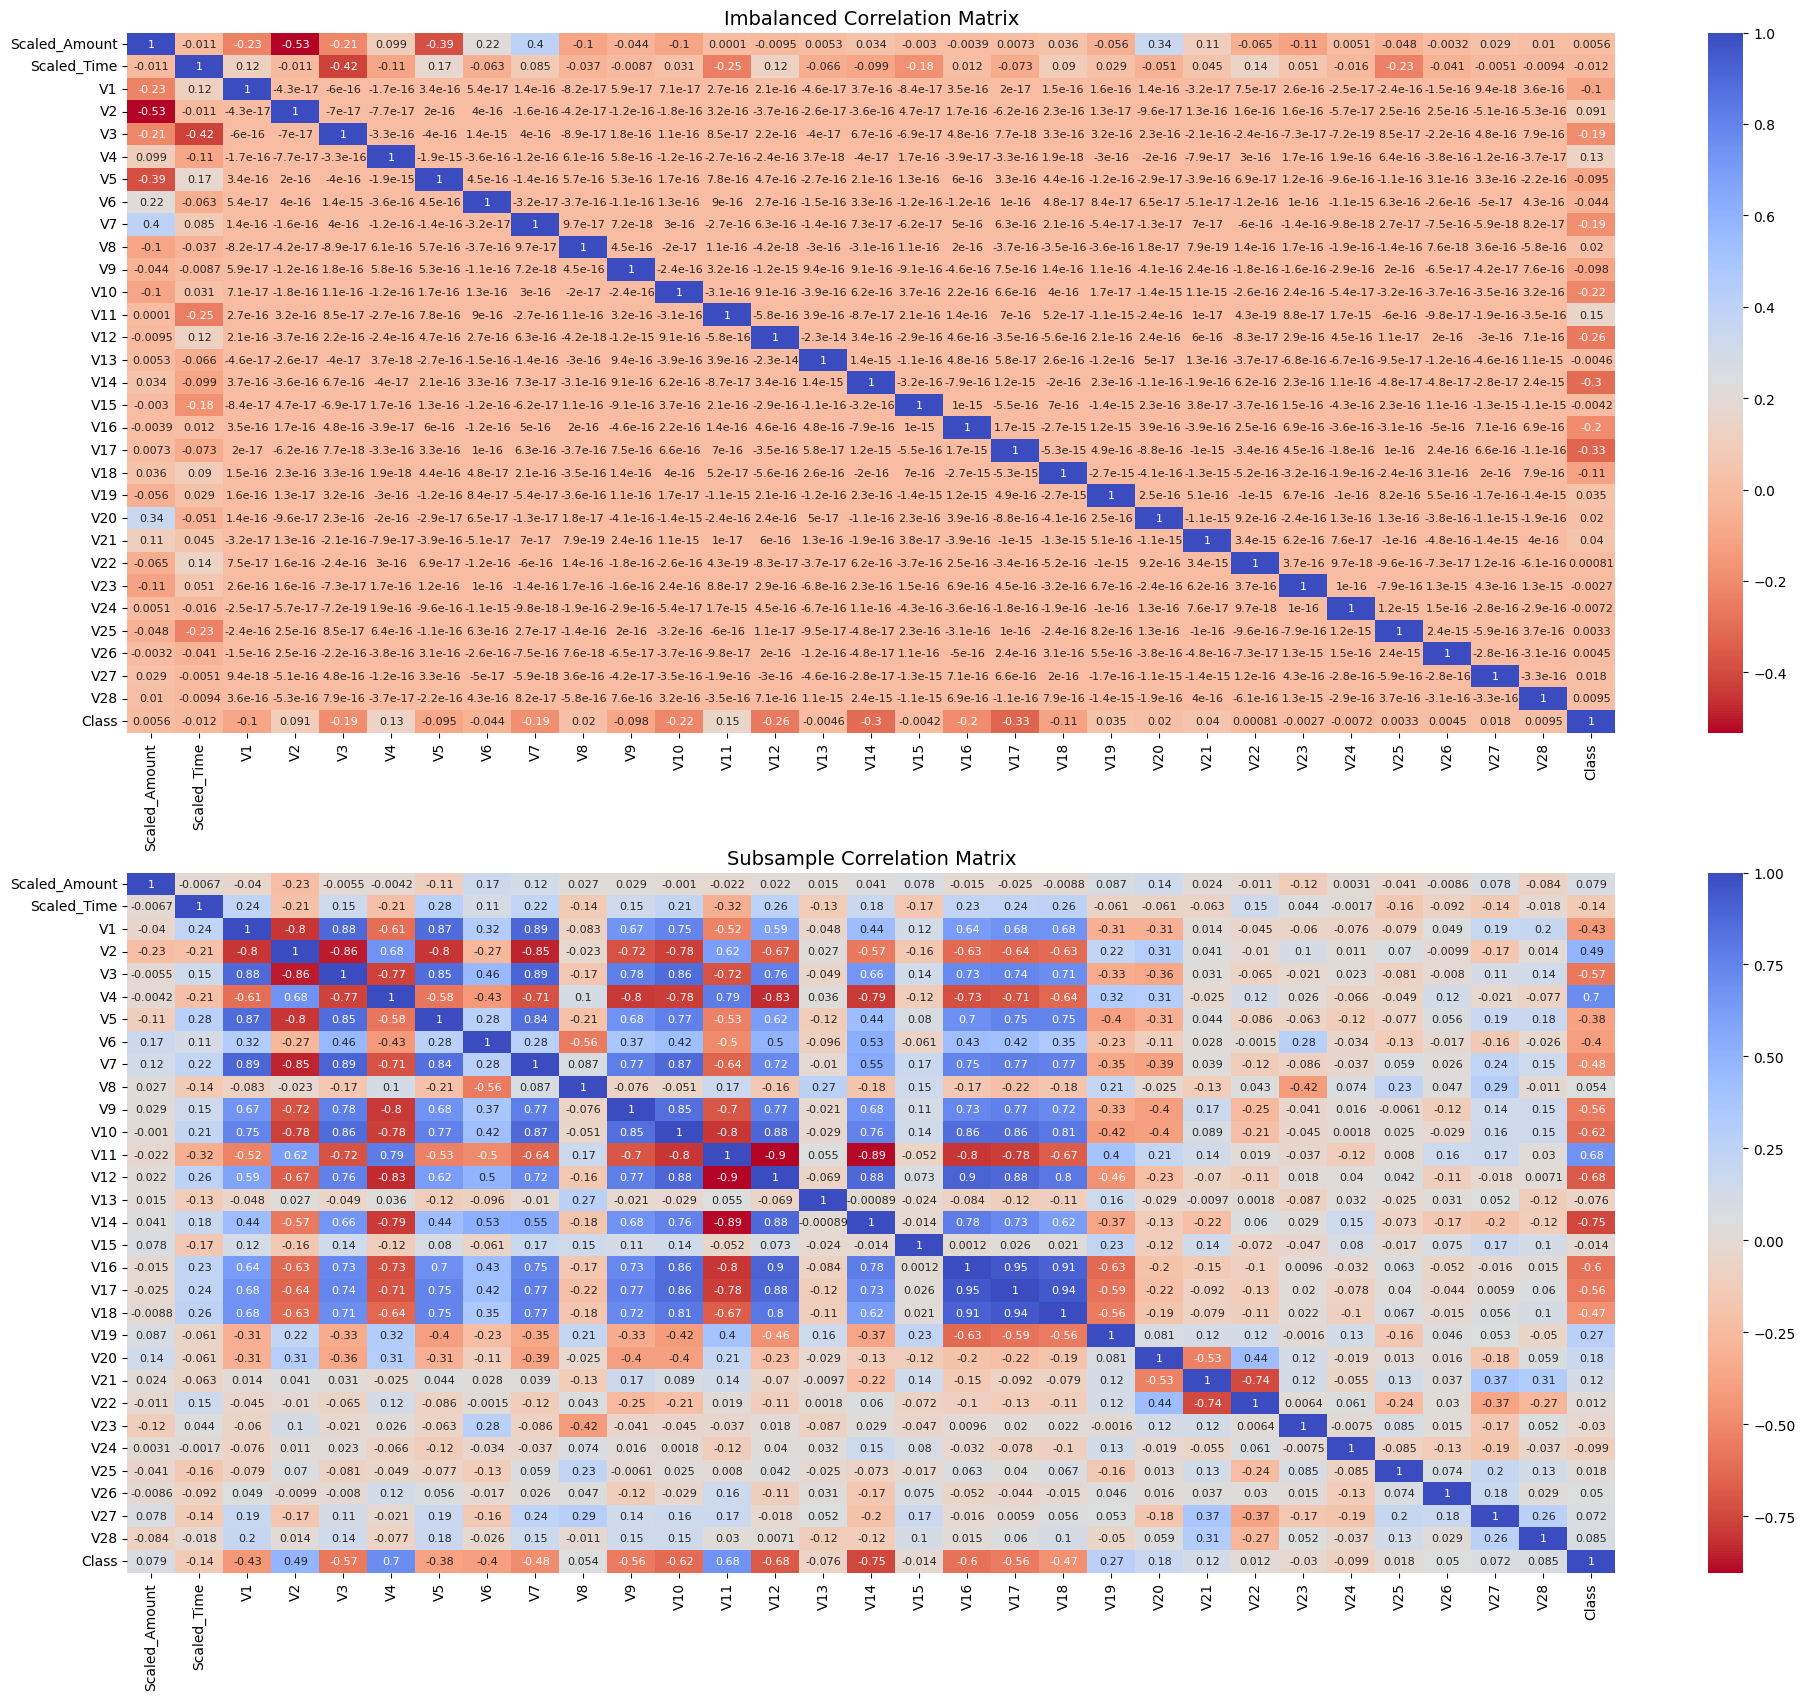

In [22]:
f,(ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot=True, annot_kws={'size':8}, ax=ax1)
ax1.set_title('Imbalanced Correlation Matrix', fontsize=14)

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot=True, annot_kws={'size':8}, ax=ax2)
ax2.set_title('Subsample Correlation Matrix', fontsize=14)
plt.show()

### **Negative Correlation**
The lower the values of the features, the most likely the class will be 1 which is fraud

Text(0.5, 1.0, 'Class vs V16 Negative Correlation')

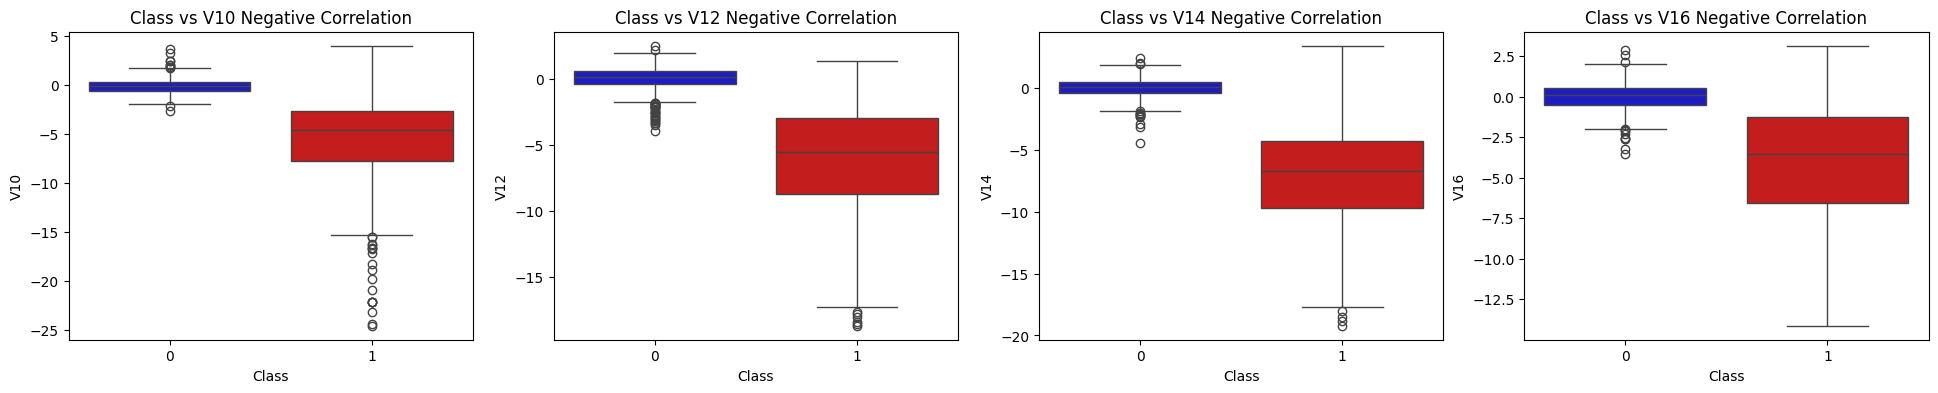

In [23]:
f, axes = plt.subplots(1, 4, figsize=(24, 4))

sns.boxplot(x='Class', y='V10', data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('Class vs V10 Negative Correlation')

sns.boxplot(x='Class', y='V12', data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('Class vs V12 Negative Correlation')

sns.boxplot(x='Class', y='V14', data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('Class vs V14 Negative Correlation')

sns.boxplot(x='Class', y='V16', data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('Class vs V16 Negative Correlation')

### **Positive Correlation**
The higher the values of the features, the most likely the class will be 1 which is fraud

Text(0.5, 1.0, 'Class vs V19 Negative Correlation')

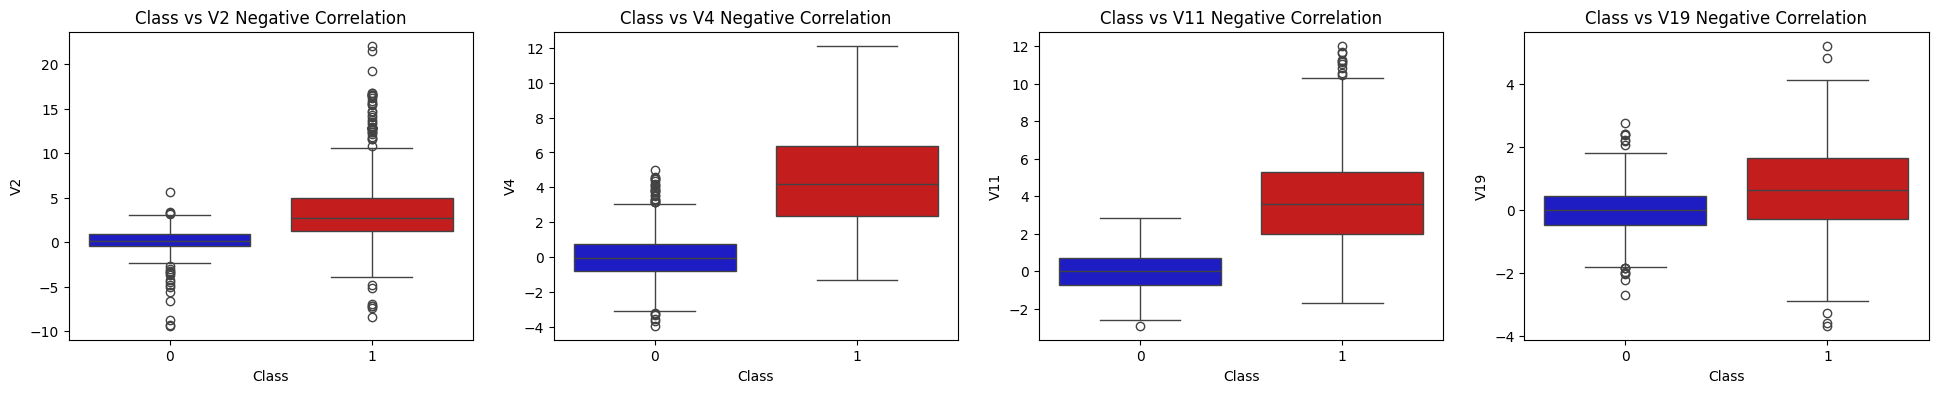

In [24]:
f, axes = plt.subplots(1, 4, figsize=(24, 4))

sns.boxplot(x='Class', y='V2', data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('Class vs V2 Negative Correlation')

sns.boxplot(x='Class', y='V4', data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('Class vs V4 Negative Correlation')

sns.boxplot(x='Class', y='V11', data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('Class vs V11 Negative Correlation')

sns.boxplot(x='Class', y='V19', data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('Class vs V19 Negative Correlation')

**Anomaly Detection using Interquartile Range Method**

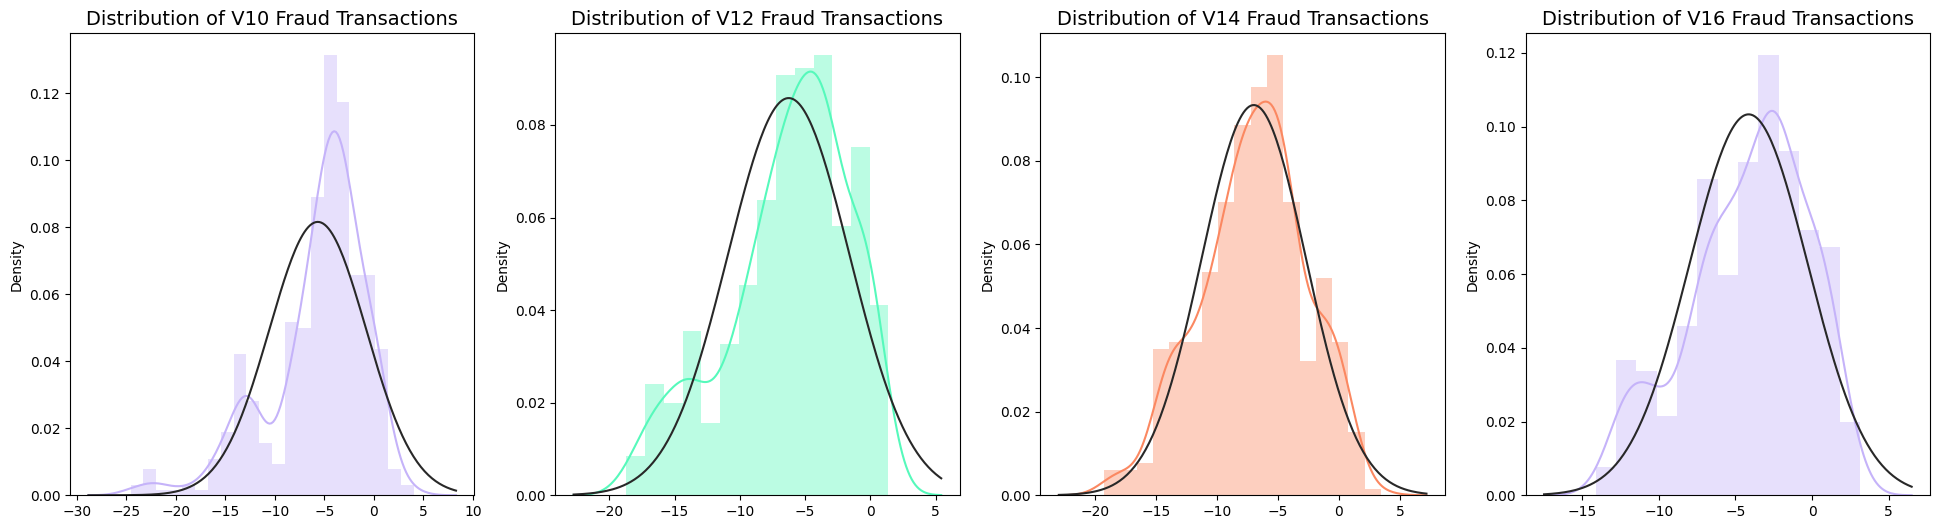

In [25]:
from scipy.stats import norm

f, axes = plt.subplots(1, 4, figsize=(24,6))

v10_fraud_dist = new_df['V10'].loc[new_df['Class']==1].values
sns.distplot(v10_fraud_dist, ax=axes[0], fit=norm, color='#C5B3F9')
axes[0].set_title('Distribution of V10 Fraud Transactions', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class']==1].values
sns.distplot(v12_fraud_dist, ax=axes[1], fit=norm, color='#56F9BB')
axes[1].set_title('Distribution of V12 Fraud Transactions', fontsize=14)

v14_fraud_dist = new_df['V14'].loc[new_df['Class']==1].values
sns.distplot(v14_fraud_dist, ax=axes[2], fit=norm, color='#FB8861')
axes[2].set_title('Distribution of V14 Fraud Transactions', fontsize=14)

v16_fraud_dist = new_df['V16'].loc[new_df['Class']==1].values
sns.distplot(v16_fraud_dist, ax=axes[3], fit=norm, color='#C5B3F9')
axes[3].set_title('Distribution of V16 Fraud Transactions', fontsize=14)

plt.show()

In [26]:
#Removing V14 outliers from fraud transactions

v14_fraud = new_df['V14'].loc[new_df['Class']==1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
print()
v14_iqr = q75-q25
print('iqr: {}'.format(v14_iqr))
print()

v14_cutoff = v14_iqr*1.5
v14_lower, v14_upper = q25-v14_cutoff, q75+v14_cutoff
print('Cut Off: {}'.format(v14_cutoff))
print()
print('V14 Lower: {}'.format(v14_lower))
print()
print('V14 Upper: {}'.format(v14_upper))
print()

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print()
print('V14 Outliers: {}'.format(outliers))

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865

iqr: 5.409902115485521

Cut Off: 8.114853173228282

V14 Lower: -17.807576138200666

V14 Upper: 3.8320323237414167

V14 Outliers for Fraud Cases: 4

V14 Outliers: [-18.8220867423816, -18.4937733551053, -19.2143254902614, -18.0499976898594]


In [27]:
#Removing V16 outliers from fraud transactions

v16_fraud = new_df['V16'].loc[new_df['Class']==1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
print()
v16_iqr = q75-q25
print('iqr: {}'.format(v16_iqr))
print()

v16_cutoff = v16_iqr*1.5
v16_lower, v16_upper = q25-v16_cutoff, q75+v16_cutoff
print('Cut Off: {}'.format(v16_cutoff))
print()
print('V16 Lower: {}'.format(v16_lower))
print()
print('V16 Upper: {}'.format(v16_upper))
print()

outliers = [x for x in v16_fraud if x < v16_lower or x > v16_upper]
print('V16 Outliers for Fraud Cases: {}'.format(len(outliers)))
print()
print('V16 Outliers: {}'.format(outliers))

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865

iqr: 5.409902115485521

Cut Off: 8.114853173228282

V16 Lower: -17.807576138200666

V16 Upper: 3.8320323237414167

V16 Outliers for Fraud Cases: 0

V16 Outliers: []


In [28]:
#Removing V12 outliers from fraud transactions

v12_fraud = new_df['V12'].loc[new_df['Class']==1].values
q25, q75= np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
print()
v12_iqr = q75 - q25
print('iqr: {}'.format(v12_iqr))
print()

v12_cutoff = v12_iqr*1.5
v12_lower, v12_upper = q25-v12_cutoff, q75+v12_cutoff
print('Cut Off: {}'.format(v12_cutoff))
print()
print('V12 Lower: {}'.format(v12_lower))
print()
print('V12 Upper: {}'.format(v12_upper))
print()

outliers = [x for x in v12_fraud if x<v12_lower or x>v12_upper]
print('V12 Outliers Fraud Cases: {}'.format(len(outliers)))
print()
print('V12 Outliers: {}'.format(outliers))

Quartile 25: -8.688176521812306 | Quartile 75: -2.97408802538493

iqr: 5.714088496427376

Cut Off: 8.571132744641064

V12 Lower: -17.25930926645337

V12 Upper: 5.597044719256134

V12 Outliers Fraud Cases: 6

V12 Outliers: [-17.6316063138707, -18.4311310279993, -17.7691434633638, -18.5536970096458, -18.0475965708216, -18.6837146333443]


In [29]:
#Removing V10 outliers from fraud transactions

v10_fraud = new_df['V10'].loc[new_df['Class']==1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v10_iqr = q75 - q25
print()
print('iqr: {}'.format(v10_iqr))
print()

v10_cutoff = v10_iqr * 1.5
v10_lower, v10_upper = q25-v10_cutoff, q75+v10_cutoff
print('Cut Off: {}'.format(v10_cutoff))
print()
print('V10 Lower: {}, V10 Upper: {}'.format(v10_lower, v10_upper))
print()

outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 Outliers Fraud Cases: {}'.format(len(outliers)))
print()
print('V10 Outliers: {}'.format(sorted(outliers)))

Quartile 25: -7.7566982278474725 | Quartile 75: -2.6141839131895623

iqr: 5.142514314657911

Cut Off: 7.713771471986866

V10 Lower: -15.47046969983434, V10 Upper: 5.099587558797303

V10 Outliers Fraud Cases: 19

V10 Outliers: [-24.5882624372475, -24.4031849699728, -23.2282548357516, -22.1870885620007, -22.1870885620007, -22.1870885620007, -22.1870885620007, -20.9491915543611, -19.836148851696, -18.9132433348732, -18.2711681738888, -17.1415136412892, -16.7460441053944, -16.6496281595399, -16.6011969664137, -16.3035376590131, -16.2556117491401, -15.5637913387301, -15.5637913387301]


In [30]:
new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)

print('Number of Rows left after Outliers Removal: {}'.format(len(new_df)))

Number of Rows left after Outliers Removal: 957


Text(0, -12, 'Fewer extreme \n outliers')

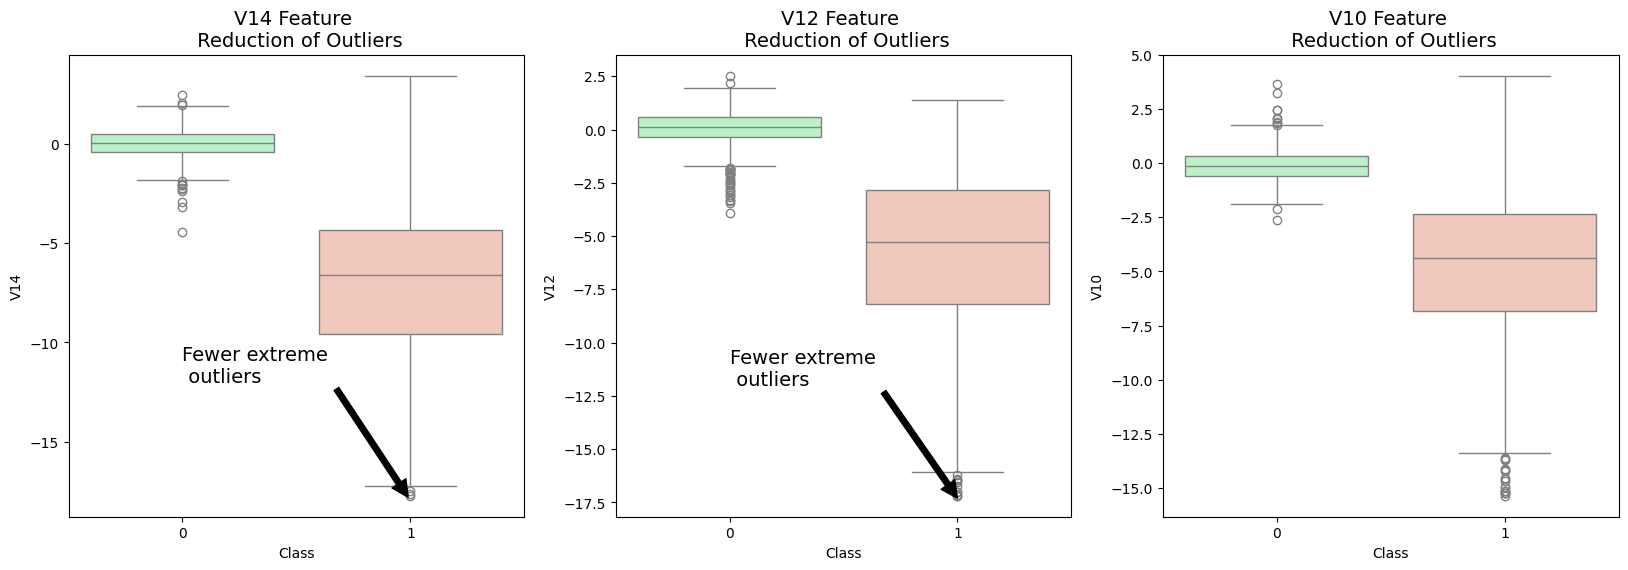

In [31]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']

sns.boxplot(x='Class', y='V14', data=new_df, ax=ax1, palette=colors)
ax1.set_title('V14 Feature \n Reduction of Outliers', fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.99, -17.8), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

sns.boxplot(x='Class', y='V12', data=new_df, ax=ax2, palette=colors)
ax2.set_title('V12 Feature \n Reduction of Outliers', fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(1, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

sns.boxplot(x='Class', y='V10', data=new_df, ax=ax3, palette=colors)
ax3.set_title('V10 Feature \n Reduction of Outliers', fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.99, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

**Dimensionality Reduction and Clustering**

In [32]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

X = new_df.drop('Class', axis=1)
Y = new_df['Class']

#t-sne
t0 = time.time()
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print('T-SNE took {:.2} s'.format(t1-t0))

#PCA
t0 = time.time()
X_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print('PCA took {:.2} s'.format(t1-t0))

#TruncatedSVD
t0 = time.time()
X_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print('Truncated SVD took {:.2} s'.format(t1-t0))

T-SNE took 2.7e+01 s
PCA took 0.012 s
Truncated SVD took 0.0067 s


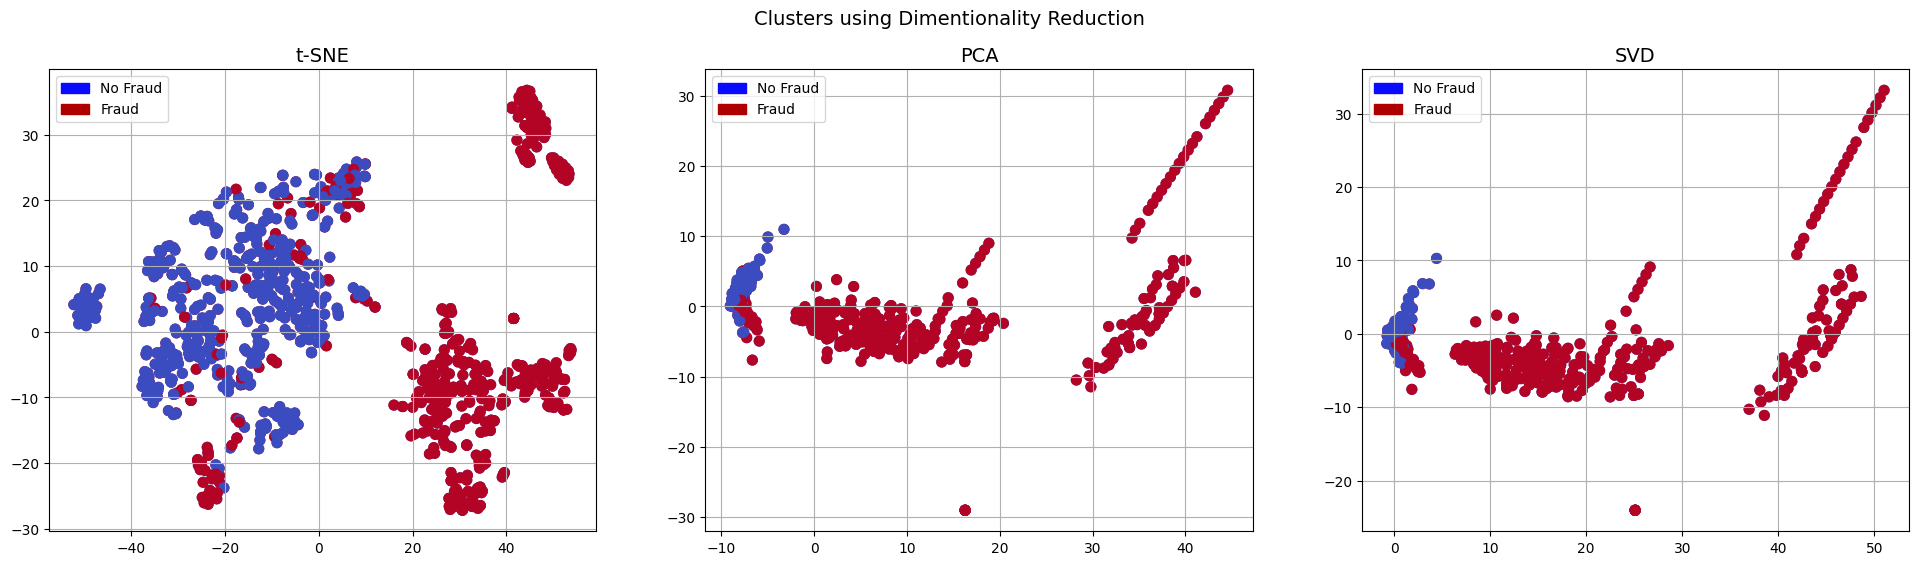

In [33]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
f.suptitle('Clusters using Dimentionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

#t-sne scatter plot
ax1.scatter(X_tsne[:,0], X_tsne[:,1], c=(Y==0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_tsne[:,0], X_tsne[:,1], c=(Y==1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

#pca scatter plot
ax2.scatter(X_pca[:,0], X_pca[:,1], c=(Y==0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_pca[:,0], X_pca[:,1], c=(Y==1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

#svd scatter plot
ax3.scatter(X_svd[:,0], X_svd[:,1], c=(Y==0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_svd[:,0], X_svd[:,1], c=(Y==1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('SVD', fontsize=14)

ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

plt.show()

###**Undersampling with different Classifiers**

In [34]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [37]:
#classifiers algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

classifiers = {
    'Logistics Regression':LogisticRegression(),
    'Decision Tree Classifier':DecisionTreeClassifier(),
    'K Nearest Neighbor':KNeighborsClassifier(),
    'Support Vector Machine':SVC(),
}

In [38]:
from sklearn.model_selection import cross_val_score

for key, value in classifiers.items():
    value.fit(X_train, y_train)
    training_score = cross_val_score(value, X_train, y_train, cv=5)
    print(key, ':', value.__class__.__name__, 'has a training score of',
          round(training_score.mean(),2)*100, '% of accuracy score.')

Logistics Regression : LogisticRegression has a training score of 94.0 % of accuracy score.
Decision Tree Classifier : DecisionTreeClassifier has a training score of 90.0 % of accuracy score.
K Nearest Neighbor : KNeighborsClassifier has a training score of 93.0 % of accuracy score.
Support Vector Machine : SVC has a training score of 93.0 % of accuracy score.


In [39]:
from sklearn.model_selection import GridSearchCV

logreg_params = {'penalty':['l1', 'l2'], 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver':['liblinear', 'saga']}
grid_logreg = GridSearchCV(LogisticRegression(), logreg_params)
grid_logreg.fit(X_train, y_train)
logreg = grid_logreg.best_estimator_

tree_params = {'criterion':['gini', 'entropy'], 'max_depth':list(range(2,4,1)), 'min_samples_leaf':list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree = grid_tree.best_estimator_

knn_params = {'n_neighbors':list(range(2,5,1)), 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params)
grid_knn.fit(X_train, y_train)
knn = grid_knn.best_estimator_

svm_params = {'C':[0.5, 0.7, 0.9, 1], 'kernel':['rbf', 'poly', 'sigmoid', 'linear']}
grid_svm = GridSearchCV(SVC(), svm_params)
grid_svm.fit(X_train, y_train)
svm = grid_svm.best_estimator_

In [40]:
logreg_score = cross_val_score(logreg, X_train, y_train, cv=5)
print('Logistics Regression Best Cross Validation Score:', round(logreg_score.mean()*100, 2).astype(str) +'%')

tree_score = cross_val_score(tree, X_train, y_train, cv=5)
print('Decision Tree Best Cross Validation Score:', round(tree_score.mean()*100, 2).astype(str) +'%')

knn_score = cross_val_score(knn, X_train, y_train, cv=5)
print('K-Nearest Neighbors Best Cross Validation Score:', round(knn_score.mean()*100, 2).astype(str) +'%')

svm_score = cross_val_score(svm, X_train, y_train, cv=5)
print('Support Vector Machine Best Cross Validation Score:', round(svm_score.mean()*100, 2).astype(str) +'%')

Logistics Regression Best Cross Validation Score: 95.03%
Decision Tree Best Cross Validation Score: 92.81%
K-Nearest Neighbors Best Cross Validation Score: 93.46%
Support Vector Machine Best Cross Validation Score: 94.77%


In [41]:
from imblearn.under_sampling import NearMiss
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from collections import Counter
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

print('Original dataset shape {}'.format(Counter(y_train)))

undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]

undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), logreg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])

    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Original dataset shape Counter({0: 386, 1: 379})
Train: [277629  23694   7987 ...  65691 174206 151345] Test: [ 82422 199462  66081 ...   9617  53005   8488]
Train: [282715 222564 277154 ...  64724  43394 282580] Test: [ 72553   6142   7051 ...  83556 110883  88741]
Train: [113808  18170 203524 ...  27342  53635 237440] Test: [  3701  95548 141810 ...  71765   5121 150166]
Train: [ 90005  46302 282349 ... 255217 230740 147693] Test: [ 35660  58405 205895 ...   7928 230688 198632]
Train: [221409 206970  24499 ... 153669 244268 186188] Test: [282809 173003 103967 ... 100658  81139 173606]
NearMiss Label Distribution: Counter({0: 492, 1: 492})


In [42]:
def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)

    # Loop through each estimator and plot the learning curve
    for ax, estimator, title in zip([ax1, ax2, ax3, ax4], [estimator1, estimator2, estimator3, estimator4], ["Logistic Regression", "Decision Tree", "K Nearest Neighbors", "Support Vector Machine"]):
        train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        ax.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
        ax.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
        ax.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
        ax.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="Cross-validation score")

        ax.set_title(title + " Learning Curve", fontsize=14)
        ax.set_xlabel('Training size (m)')
        ax.set_ylabel('Score')
        ax.grid(True)
        ax.legend(loc="best")

    return plt

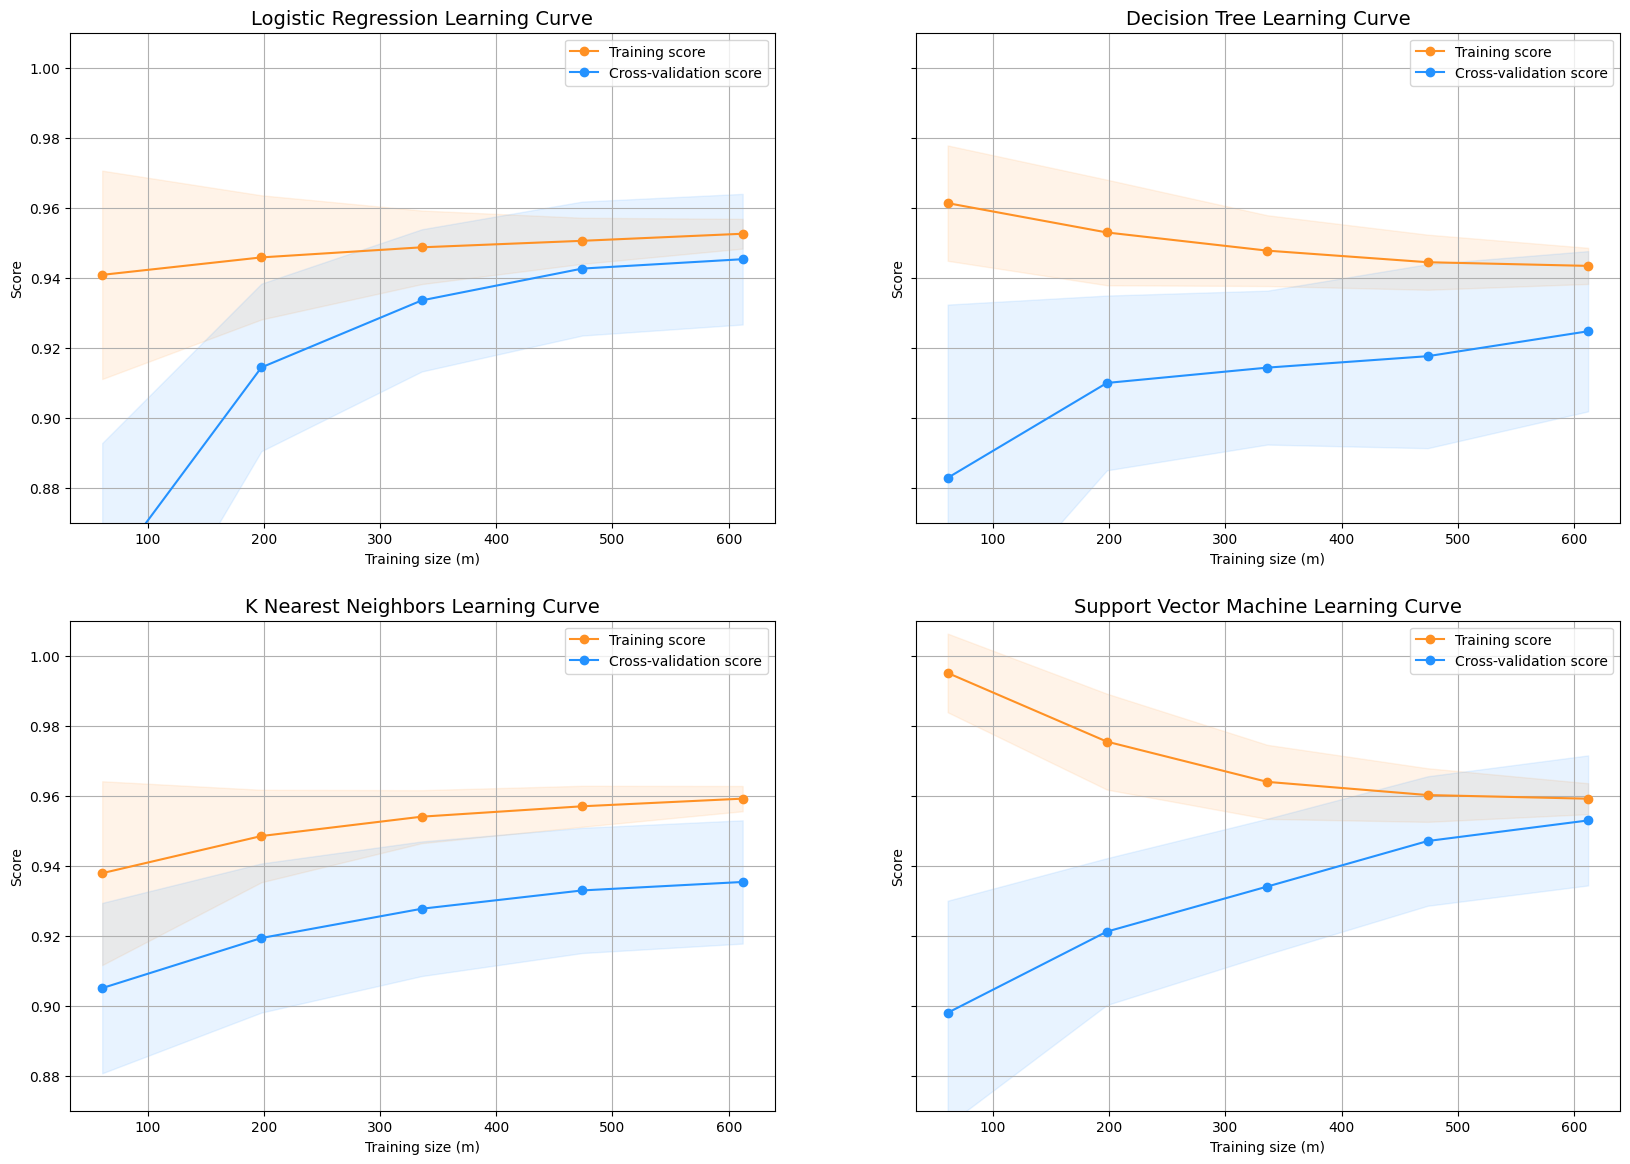

In [43]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(logreg, tree, knn, svm, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)
plt.show()

In [44]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

logreg_pred = cross_val_predict(logreg, X_train, y_train, cv=5, method='decision_function')
tree_pred = cross_val_predict(tree, X_train, y_train, cv=5)
knn_pred = cross_val_predict(knn, X_train, y_train, cv=5)
svm_pred = cross_val_predict(svm, X_train, y_train, cv=5, method='decision_function')

In [45]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, logreg_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knn_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svm_pred))

Logistic Regression:  0.9757337963279424
Decision Tree Classifier:  0.9305815686220898
KNears Neighbors:  0.9342283347232286
Support Vector Classifier:  0.9828290975706454


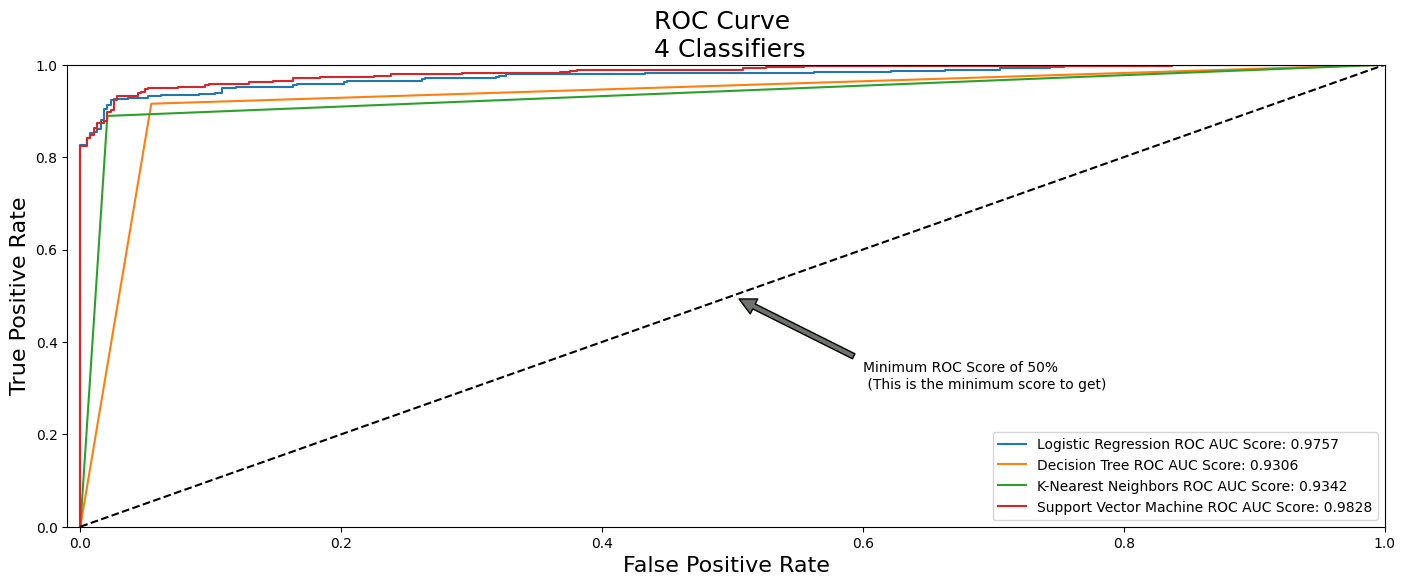

In [46]:
logreg_fpr, logreg_tpr, logreg_threshold = roc_curve(y_train, logreg_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)
knn_fpr, knn_tpr, knn_threshold = roc_curve(y_train, knn_pred)
svm_fpr, svm_tpr, svm_threshold = roc_curve(y_train, svm_pred)

def roc_curve_graph(logreg_fpr, logreg_tpr, tree_fpr, tree_tpr,knn_fpr, knn_tpr,svm_fpr, svm_tpr):
    plt.figure(figsize=(17,6))
    plt.title('ROC Curve \n 4 Classifiers', fontsize=18)
    plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression ROC AUC Score: {:.4f}'.
             format(roc_auc_score(y_train, logreg_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree ROC AUC Score: {:.4f}'.
             format(roc_auc_score(y_train, tree_pred)))
    plt.plot(knn_fpr, knn_tpr, label='K-Nearest Neighbors ROC AUC Score: {:.4f}'.
             format(roc_auc_score(y_train, knn_pred)))
    plt.plot(svm_fpr, svm_tpr, label='Support Vector Machine ROC AUC Score: {:.4f}'.
             format(roc_auc_score(y_train, svm_pred)))
    plt.plot([0,1], [0,1],'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),)
    plt.legend()

roc_curve_graph(logreg_fpr, logreg_tpr, tree_fpr, tree_tpr,knn_fpr, knn_tpr,svm_fpr, svm_tpr)
plt.show()

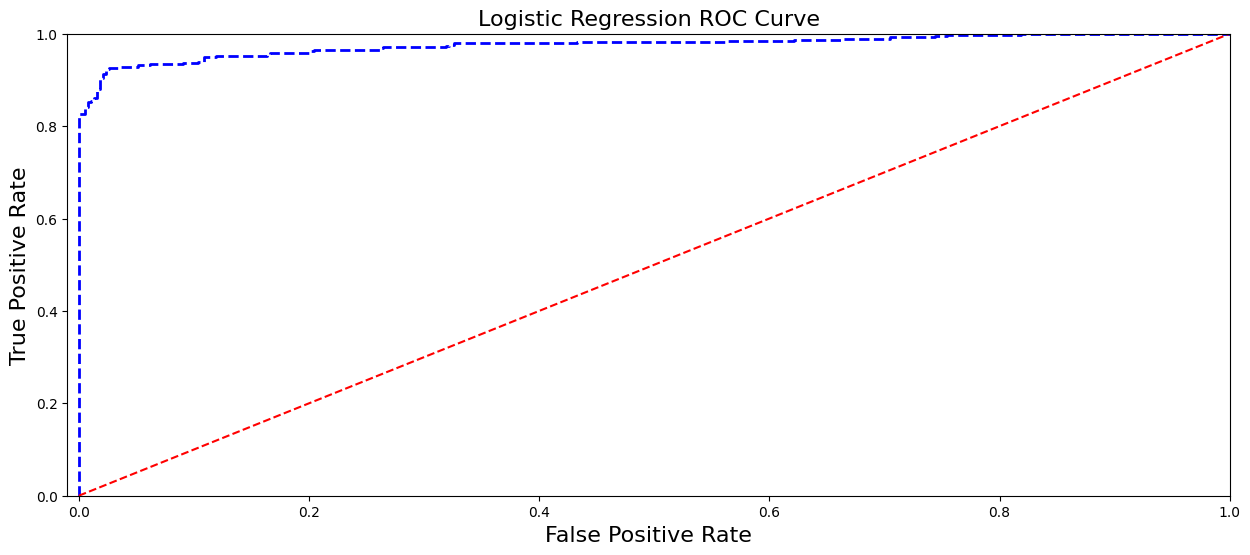

In [47]:
def logistic_roc_curve(logreg_fpr, logreg_tpr):
    plt.figure(figsize=(15,6))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(logreg_fpr, logreg_tpr, 'b--', linewidth=2)
    plt.plot([0,1], [0,1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01, 1, 0, 1])

logistic_roc_curve(logreg_fpr, logreg_tpr)
plt.show()

In [48]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, logreg_pred)

In [49]:
y_pred = logreg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.91
Precision Score: 0.71
F1 Score: 0.79
Accuracy Score: 0.77
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.62
Precision Score: 0.00
Recall Score: 0.34
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


In [50]:
undersample_y_score = logreg.decision_function(original_Xtest)

In [51]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(undersample_average_precision))

Average precision-recall score: 0.14


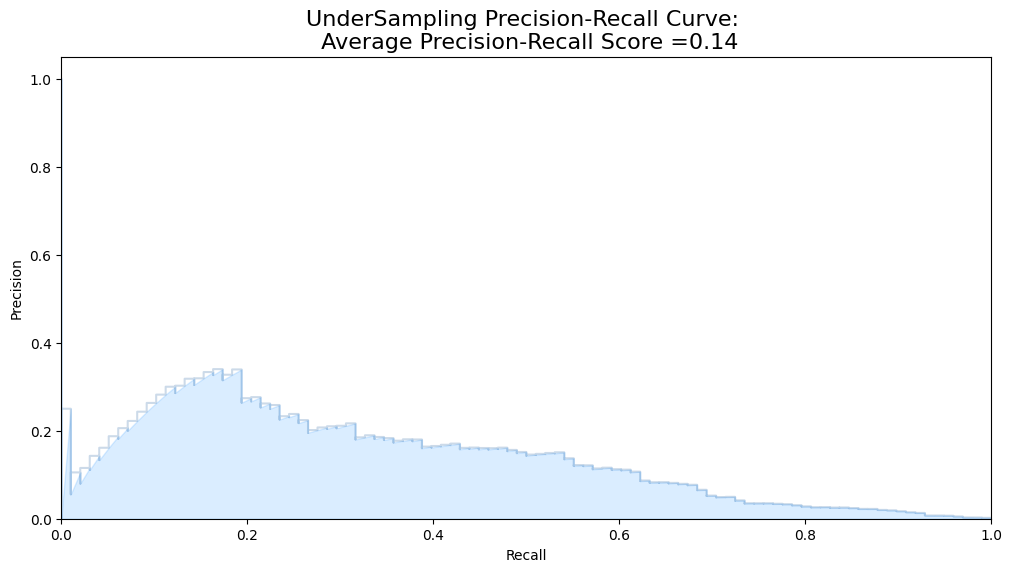

In [52]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall Curve: \n Average Precision-Recall Score ={0:0.2f}'.format(undersample_average_precision)
,fontsize=16)
plt.show()

###**SMOTE Oversampling with Logistic Regression**

In [53]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

print('Length of X train: {} | Length of y train: {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X test: {} | Length of y test: {}'.format(len(original_Xtest), len(original_ytest)))

accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

logreg_sm = LogisticRegression()

logreg_rand = RandomizedSearchCV(LogisticRegression(), logreg_params, n_iter=4)

# Resample the training data with SMOTE
for train, test in sss.split(original_Xtrain, original_ytrain):
  pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'),logreg_rand)
  model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
  best_est = logreg_rand.best_estimator_
  pred = best_est.predict(original_Xtrain[test])

  accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
  precision_lst.append(precision_score(original_ytrain[test], pred))
  recall_lst.append(recall_score(original_ytrain[test], pred))
  f1_lst.append(f1_score(original_ytrain[test], pred))
  auc_lst.append(roc_auc_score(original_ytrain[test], pred))


print('')
print('accuracy:{}'.format(np.mean(accuracy_lst)))
print('precision:{}'.format(np.mean(precision_lst)))
print('recall:{}'.format(np.mean(recall_lst)))
print('f1:{}'.format(np.mean(f1_lst)))
print('auc:{}'.format(np.mean(auc_lst)))



Length of X train: 227845 | Length of y train: 227845
Length of X test: 56962 | Length of y test: 56962

accuracy:0.9764971801005069
precision:0.06424157648148625
recall:0.9215189873417721
f1:0.12006664594908452
auc:0.9490558225343724


In [54]:
labels = ['No Fraud','Fraud']
smote_ypred = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_ypred, target_names = labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.98      0.99     56864
       Fraud       0.07      0.90      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [55]:
y_score = best_est.decision_function(original_Xtest)

In [56]:
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.77


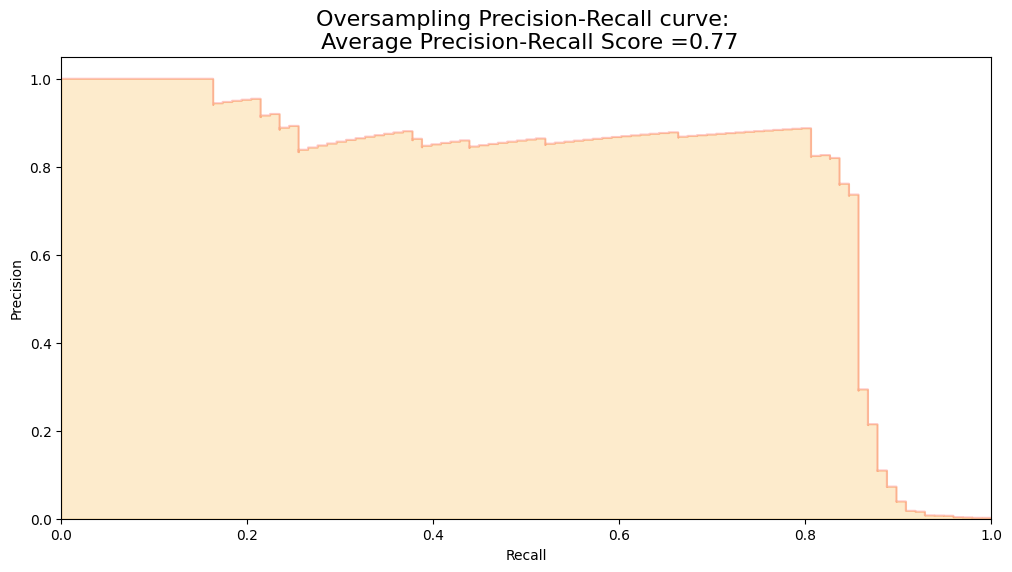

In [57]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Oversampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)
plt.show()

In [58]:
sm = SMOTE(sampling_strategy='minority', random_state=42)

Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)


In [59]:
t0 = time.time()
logreg_sm = grid_logreg.best_estimator_
logreg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print('Fitting oversample data took: {}'.format(t1-t0))

Fitting oversample data took: 6.72359037399292


###**Test Data with Logistic Regression Using Confusion Matrix**

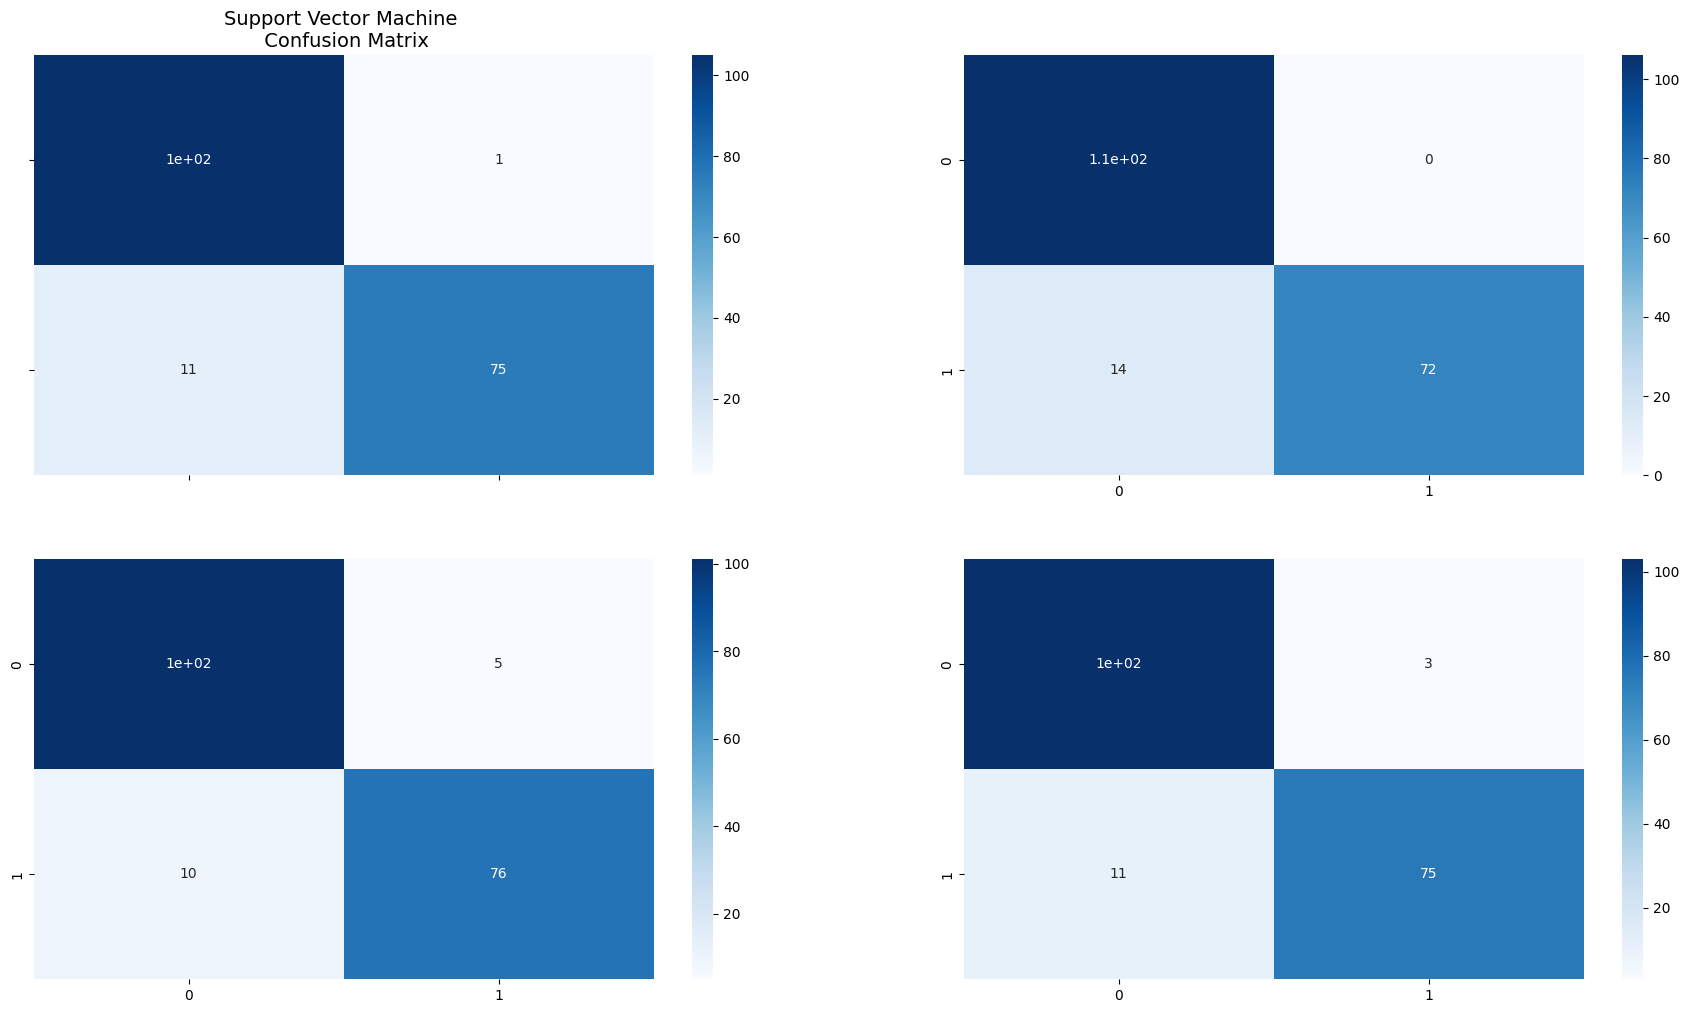

In [60]:
from sklearn.metrics import confusion_matrix

y_pred_logreg = logreg_sm.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_tree = tree.predict(X_test)
y_pred_svm = svm.predict(X_test)

logreg_cf = confusion_matrix(y_test, y_pred_logreg)
knn_cf = confusion_matrix(y_test, y_pred_knn)
tree_cf = confusion_matrix(y_test, y_pred_tree)
svm_cf = confusion_matrix(y_test, y_pred_svm)

fig, ax = plt.subplots(2, 2, figsize=(22,12))
sns.heatmap(logreg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.Blues)
ax[0,0].set_title('Logistic Regression \n Confusion Matrix', fontsize=14)
ax[0,0].set_xticklabels(['',''], fontsize=14, rotation=90)
ax[0,0].set_yticklabels(['',''], fontsize=14, rotation=360)

sns.heatmap(knn_cf, ax=ax[0][1], annot=True, cmap=plt.cm.Blues)
ax[0,0].set_title('K-Nearest Neighbors \n Confusion Matrix', fontsize=14)
ax[0,0].set_xticklabels(['',''], fontsize=14, rotation=90)
ax[0,0].set_yticklabels(['',''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][0], annot=True, cmap=plt.cm.Blues)
ax[0,0].set_title('Decision Tree \n Confusion Matrix', fontsize=14)
ax[0,0].set_xticklabels(['',''], fontsize=14, rotation=90)
ax[0,0].set_yticklabels(['',''], fontsize=14, rotation=360)

sns.heatmap(svm_cf, ax=ax[1][1], annot=True, cmap=plt.cm.Blues)
ax[0,0].set_title('Support Vector Machine \n Confusion Matrix', fontsize=14)
ax[0,0].set_xticklabels(['',''], fontsize=14, rotation=90)
ax[0,0].set_yticklabels(['',''], fontsize=14, rotation=360)

plt.show()

In [61]:
from sklearn.metrics import classification_report

print('Logistic Regression:')
print(classification_report(y_test, y_pred_logreg))
print('K-Nearest Neighbors:')
print(classification_report(y_test, y_pred_knn))
print('Decision Tree:')
print(classification_report(y_test, y_pred_tree))
print('Support Vector Machine:')
print(classification_report(y_test, y_pred_svm))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       106
           1       0.99      0.87      0.93        86

    accuracy                           0.94       192
   macro avg       0.95      0.93      0.94       192
weighted avg       0.94      0.94      0.94       192

K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       106
           1       1.00      0.84      0.91        86

    accuracy                           0.93       192
   macro avg       0.94      0.92      0.92       192
weighted avg       0.94      0.93      0.93       192

Decision Tree:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       106
           1       0.94      0.88      0.91        86

    accuracy                           0.92       192
   macro avg       0.92      0.92      0.92       192
weighted avg     

In [62]:
from sklearn.metrics import accuracy_score

y_pred = logreg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)

y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)

table = {'Technique': ['Random Undersampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=table)

score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

final_df

,Technique,Score
0,Random Undersampling,0.937500
1,Oversampling (SMOTE),0.978161


###**Random Undersampling vs Oversampling SMOTE Using Keras**

**Random Undersampling**

In [63]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ),activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(2, activation = 'softmax')]
)


In [64]:
undersample_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 32)                992       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1988 (7.77 KB)
Trainable params: 1988 (7.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
undersample_model.compile(Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [66]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
25/25 - 2s - loss: 0.5779 - accuracy: 0.6503 - val_loss: 0.4204 - val_accuracy: 0.8301 - 2s/epoch - 63ms/step
Epoch 2/20
25/25 - 0s - loss: 0.3292 - accuracy: 0.8938 - val_loss: 0.3049 - val_accuracy: 0.8954 - 83ms/epoch - 3ms/step
Epoch 3/20
25/25 - 0s - loss: 0.2366 - accuracy: 0.9363 - val_loss: 0.2632 - val_accuracy: 0.8889 - 85ms/epoch - 3ms/step
Epoch 4/20
25/25 - 0s - loss: 0.1915 - accuracy: 0.9444 - val_loss: 0.2428 - val_accuracy: 0.9085 - 78ms/epoch - 3ms/step
Epoch 5/20
25/25 - 0s - loss: 0.1632 - accuracy: 0.9477 - val_loss: 0.2337 - val_accuracy: 0.9020 - 78ms/epoch - 3ms/step
Epoch 6/20
25/25 - 0s - loss: 0.1428 - accuracy: 0.9493 - val_loss: 0.2297 - val_accuracy: 0.8954 - 79ms/epoch - 3ms/step
Epoch 7/20
25/25 - 0s - loss: 0.1300 - accuracy: 0.9542 - val_loss: 0.2311 - val_accuracy: 0.9150 - 72ms/epoch - 3ms/step
Epoch 8/20
25/25 - 0s - loss: 0.1178 - accuracy: 0.9559 - val_loss: 0.2307 - val_accuracy: 0.9150 - 85ms/epoch - 3ms/step
Epoch 9/20
25/25 - 0s - l

In [67]:
undersample_pred = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [68]:
undersample_fraud_pred = np.argmax(undersample_pred, axis=1) # Get class with highest probability

In [69]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized Confusion Matrix')

  else:
    print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment='center',
               color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')



Confusion Matrix, without normalization
[[54755  2109]
 [    4    94]]
Confusion Matrix, without normalization
[[56864     0]
 [    0    98]]


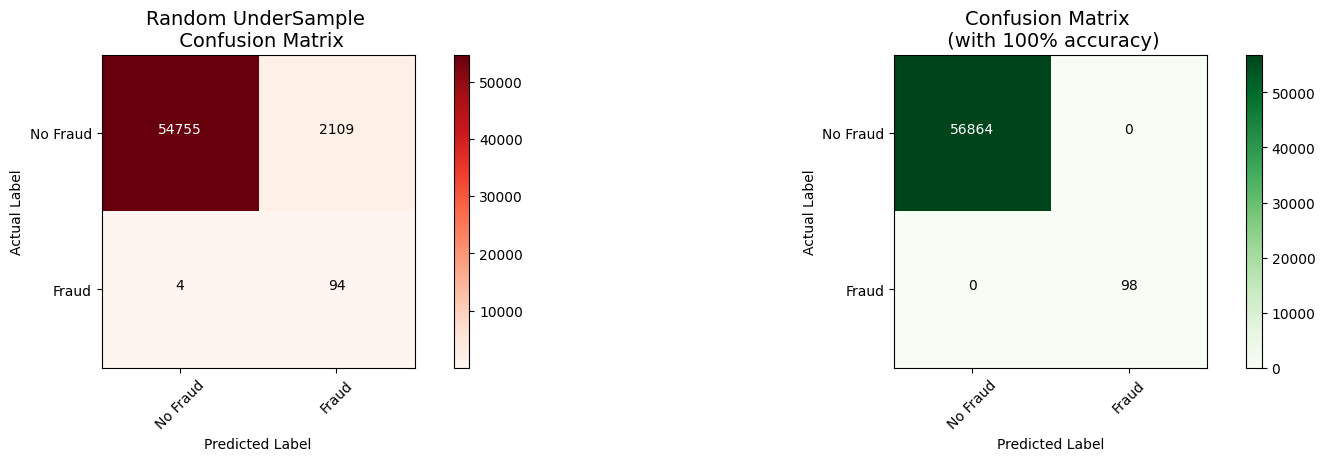

In [70]:
undersample_cm = confusion_matrix(original_ytest, undersample_fraud_pred)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

**KERAS Oversampling (SMOTE)**

In [71]:
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [72]:
oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [73]:
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20,
                     shuffle=True, verbose=2)

Epoch 1/20
1214/1214 - 3s - loss: 0.0696 - accuracy: 0.9731 - val_loss: 0.0285 - val_accuracy: 0.9957 - 3s/epoch - 3ms/step
Epoch 2/20
1214/1214 - 3s - loss: 0.0145 - accuracy: 0.9967 - val_loss: 0.0077 - val_accuracy: 1.0000 - 3s/epoch - 2ms/step
Epoch 3/20
1214/1214 - 3s - loss: 0.0078 - accuracy: 0.9984 - val_loss: 0.0041 - val_accuracy: 1.0000 - 3s/epoch - 2ms/step
Epoch 4/20
1214/1214 - 3s - loss: 0.0056 - accuracy: 0.9989 - val_loss: 0.0024 - val_accuracy: 1.0000 - 3s/epoch - 3ms/step
Epoch 5/20
1214/1214 - 3s - loss: 0.0042 - accuracy: 0.9992 - val_loss: 0.0046 - val_accuracy: 0.9999 - 3s/epoch - 3ms/step
Epoch 6/20
1214/1214 - 3s - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0026 - val_accuracy: 1.0000 - 3s/epoch - 2ms/step
Epoch 7/20
1214/1214 - 2s - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0022 - val_accuracy: 1.0000 - 2s/epoch - 2ms/step
Epoch 8/20
1214/1214 - 2s - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0013 - val_accuracy: 0.9999 - 2s/epoch - 2ms/step
Epoch 9/

In [78]:
oversample_pred = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [81]:
oversample_fraud_pred = np.argmax(oversample_pred, axis=1) # Use np.argmax to get predicted classes

Confusion Matrix, without normalization
[[56838    26]
 [   17    81]]
Confusion Matrix, without normalization
[[56864     0]
 [    0    98]]


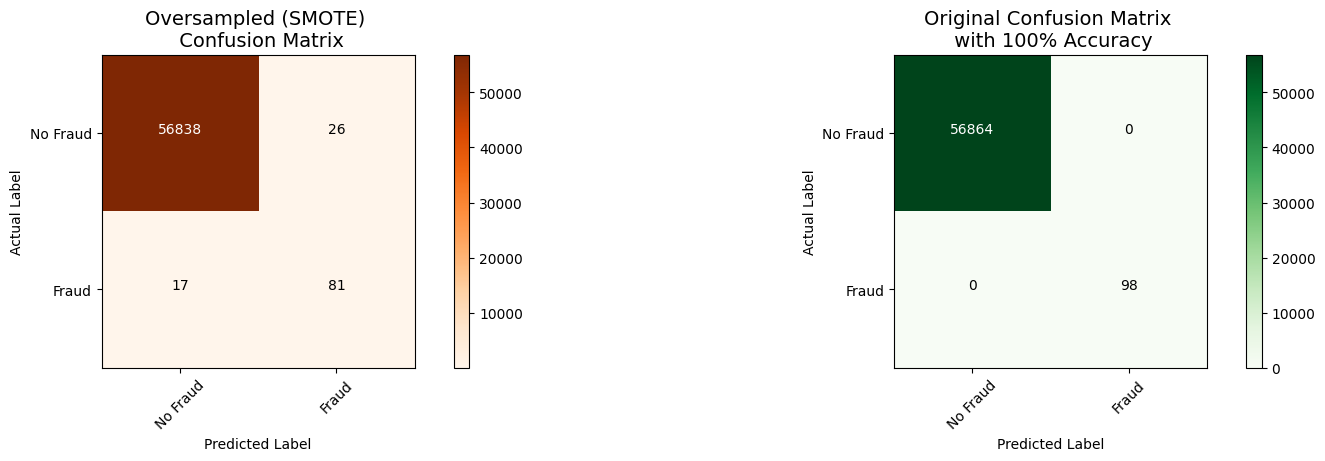

In [84]:
oversample_cm = confusion_matrix(original_ytest, oversample_fraud_pred)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_cm, classes=labels, title='Oversampled (SMOTE) \n Confusion Matrix',
                      cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, classes=labels, title='Original Confusion Matrix \n with 100% Accuracy',
                      cmap=plt.cm.Greens)